## Final Project Submission

* Student name: Jonathan Bardey
* Student pace: self paced 
* Blog post URL:


In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import itertools


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc 
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

#universal random state for modeling
random_state = 42

In [2]:
#read in and preview the dataset
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Attribute Information:

#### Input variables:
##### Client data:
1. age (numeric) 
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown') 

##### Related with the last contact of the current campaign: 
8. contact: contact communication type (categorical: 'cellular','telephone')
9.   month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

##### Other attributes: 
12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  previous: number of contacts performed before this campaign and for this client (numeric)
15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') 


##### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)


#### Output variable (desired target)
21. y - has the client subscribed a term deposit? (binary: 'yes','no') 

#### Source:
Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [3]:
#Preview the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
#check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values.  Thanks UCI for the clean dataset!

In [5]:
#Look at five point statistics for numerical features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#Rename target column to 'deposit' as we want to ascertain whether or not the client subscribed to a term deposit
df.rename(columns = {'y' : 'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


no     36548
yes     4640
Name: deposit, dtype: int64


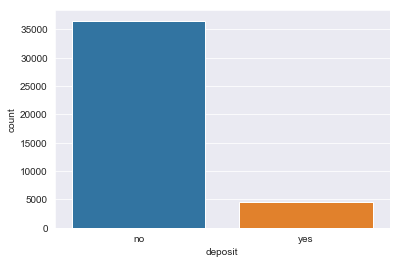

11.27% of the 41188 calls resulted in deposits.


In [7]:
#lets check and plot occurences of our target variable 'deposit'
print(df.deposit.value_counts())
sns.countplot(df.deposit)
plt.show()
print(f'{round(sum(df.deposit == "yes") / len(df)*100, 2)}% of the {len(df)} calls resulted in deposits.')

As seen above the dataset is heavily imbalanced towards 'no' deposit.  At a later stage we can use a sampling technique to balance our data for modeling.

### Examining the Duration Column
According to the provided dataset information, the duration feature "*highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*" <br>
Before discarding the column, I just want to look at distributions for duration of calls by target class.

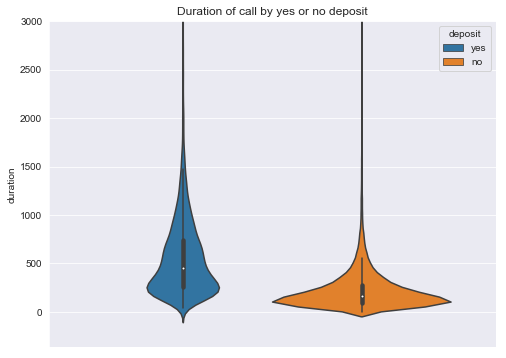

In [8]:
#plot violin plot of duration by yes or no deposit
df['all'] = ""
plt.figure(figsize=(8,6))
sns.violinplot(x = "all", y="duration", hue="deposit", hue_order=['yes', 'no'], orient="v", data=df)
plt.xlabel("")
plt.title("Duration of call by yes or no deposit")
plt.ylim(top=3000)
plt.show()
df = df.drop('all', axis=1)

In [9]:
duration_yes = df.duration[df.deposit == 'yes']
duration_no = df.duration[df.deposit == 'no']

print(f'The mean call duration leading to a deposit is {round(duration_yes.mean()/60, 2)} minutes.')
print(f'The mean call duration leading to no is {round(duration_no.mean()/60, 2)} minutes.')

The mean call duration leading to a deposit is 9.22 minutes.
The mean call duration leading to no is 3.68 minutes.


We see that there is definitely a noticeable difference in call duration for the two classes.  The average call that leads to a client subscribing to the term deposit is more than 5 minutes longer that for non-subscribers.  Intuitively, this makes sense as clients with more interest in the product would stay on the phone longer.  We will take the recommendation from the dataset provider and discard the column.

In [10]:
#dropping Duration column
df.drop('duration', axis=1, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Feature Exploration

Next we will separate the numerical and categorical features for further exploration.

In [11]:
cat_features = df.select_dtypes(include = ['object'])
cat_features = cat_features.drop('deposit', axis=1)
num_features = df.select_dtypes(include = ['int64', 'float64'])
print(f'There are {len(cat_features.columns)} categorical features.\n')
print(cat_features.columns)
print('-' * 50)
print(f'There are {len(num_features.columns)} numerical features.\n')
print(num_features.columns)

There are 10 categorical features.

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
--------------------------------------------------
There are 9 numerical features.

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [12]:
cat_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


job:

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


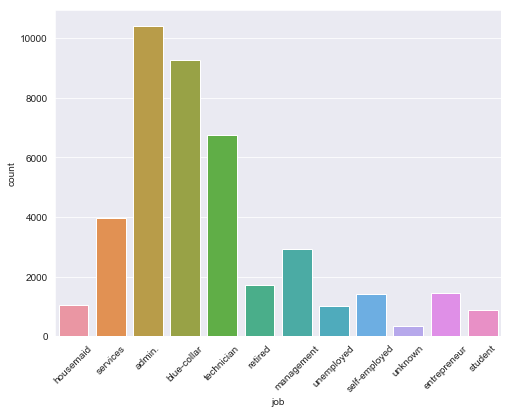

marital:

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


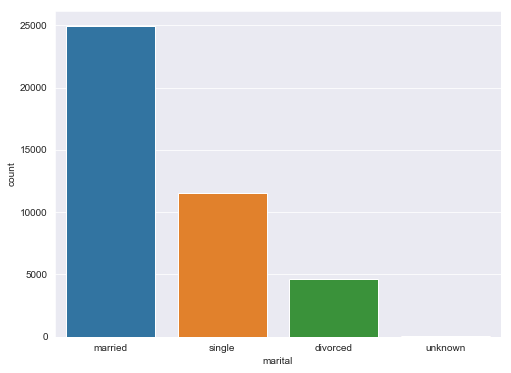

education:

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


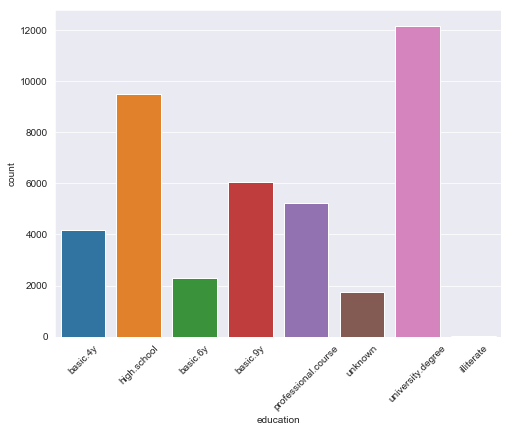

default:

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


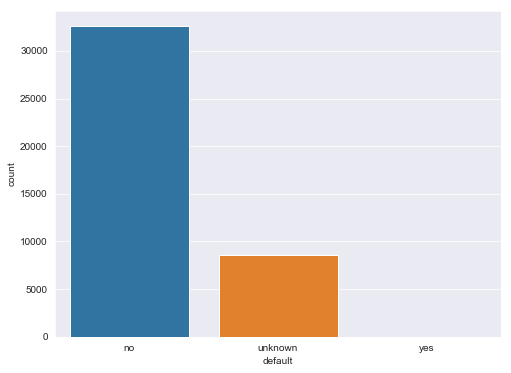

housing:

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


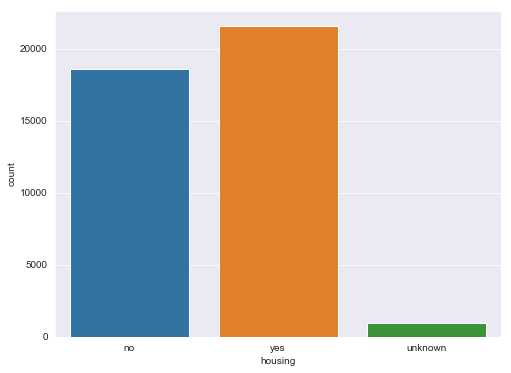

loan:

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


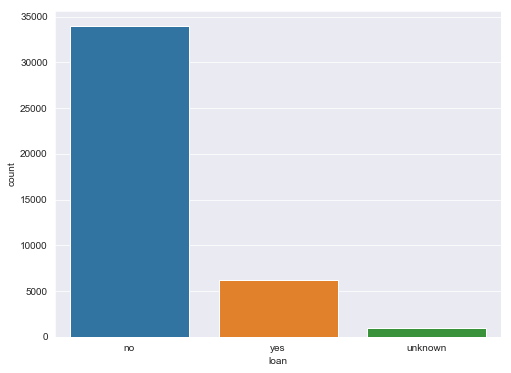

contact:

cellular     26144
telephone    15044
Name: contact, dtype: int64


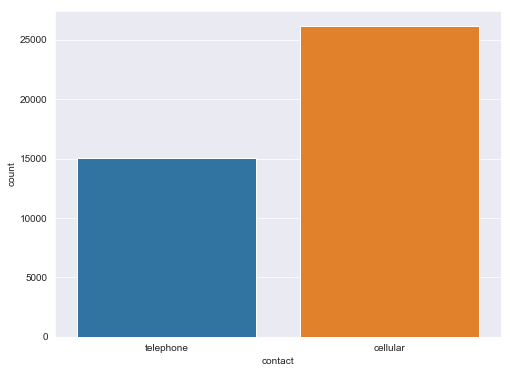

month:

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


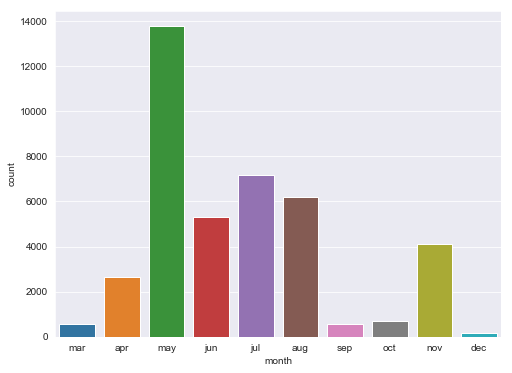

day_of_week:

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


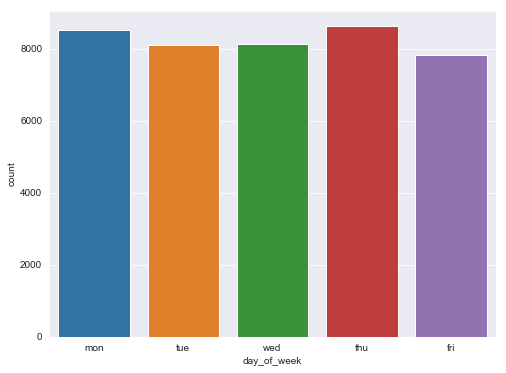

poutcome:

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


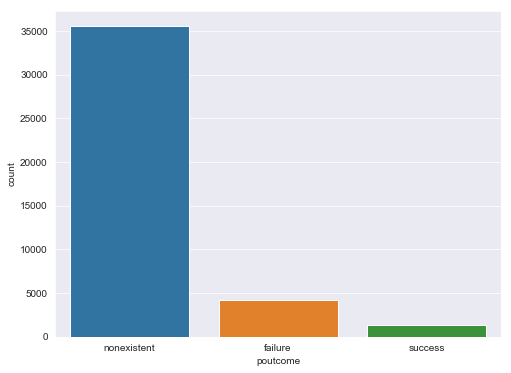

In [13]:
#Visualize unique values and countplots for each of the categorical variables
for col in cat_features:
    print(f'{col}:\n')
    print(cat_features[col].value_counts())
    plt.figure(figsize=(8,6))
    if col == 'month':
        sns.countplot(x = col, data = cat_features, 
                      order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
    else:
        sns.countplot(x = col, data = cat_features)
        if col == 'job' or col == 'education':
            plt.xticks(rotation = 45)
    plt.show()

Let's take a look at histograms of our numerical columns to get a sense of the data.  We will then decide if we need to apply a scaler these features.

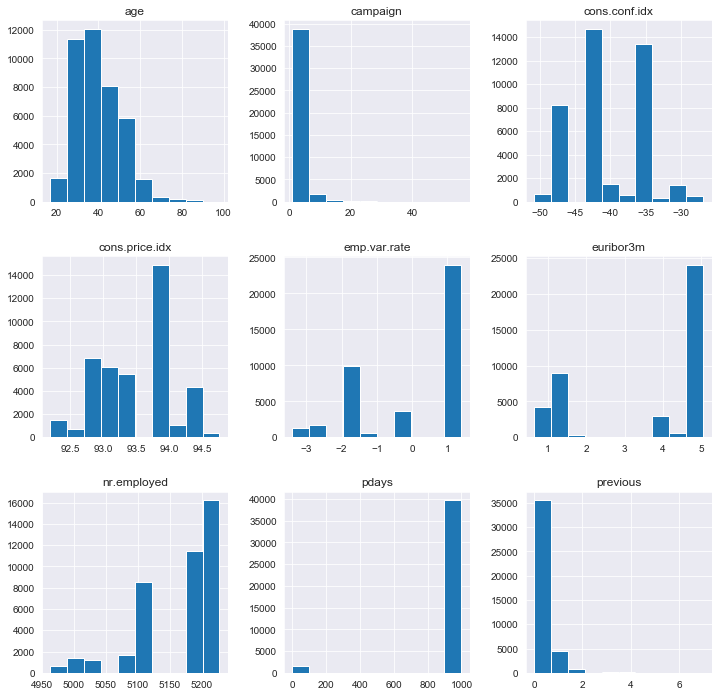

In [14]:
#Plot histograms of numerical columns
num_features.hist(figsize=(12,12))
plt.show()

Now we will look at a Correlation Matrix to check for multicollinearity among numerical features.

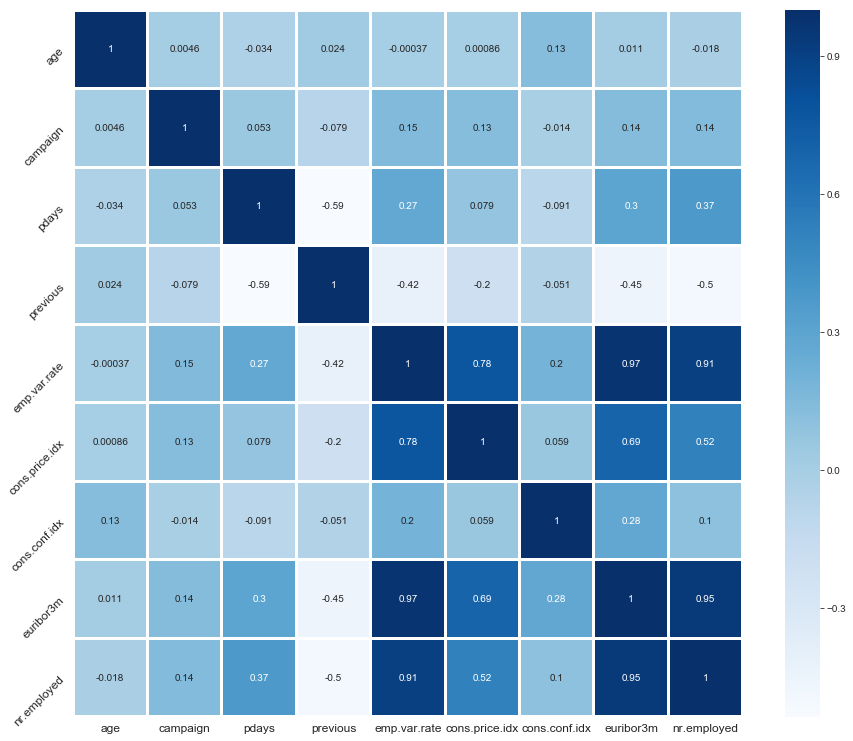

In [15]:
corr = num_features.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr, fmt='.2g', cmap = 'Blues', annot = True, linewidth = 2, robust = True)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation=45)
plt.show()

Several of the social and economic context attributes exhibit a huge degree of multicolinearity. We can drop a couple of them from our feature list before modeling to reduce multicollinearity.  emp.var.rate, euribor3m and rr.employed are all very highly correlated, we will keep just 1 of them and rr.employed will reduce multicollinearity the most.

In [16]:
#drop 'emp.var.rate' and 'euribor3m' column from numerical features 
num_features.drop(columns = ['emp.var.rate', 'euribor3m'], inplace=True)

num_features.head()


,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
0,56,1,999,0,93.994,-36.4,5191.0
1,57,1,999,0,93.994,-36.4,5191.0
2,37,1,999,0,93.994,-36.4,5191.0
3,40,1,999,0,93.994,-36.4,5191.0
4,56,1,999,0,93.994,-36.4,5191.0


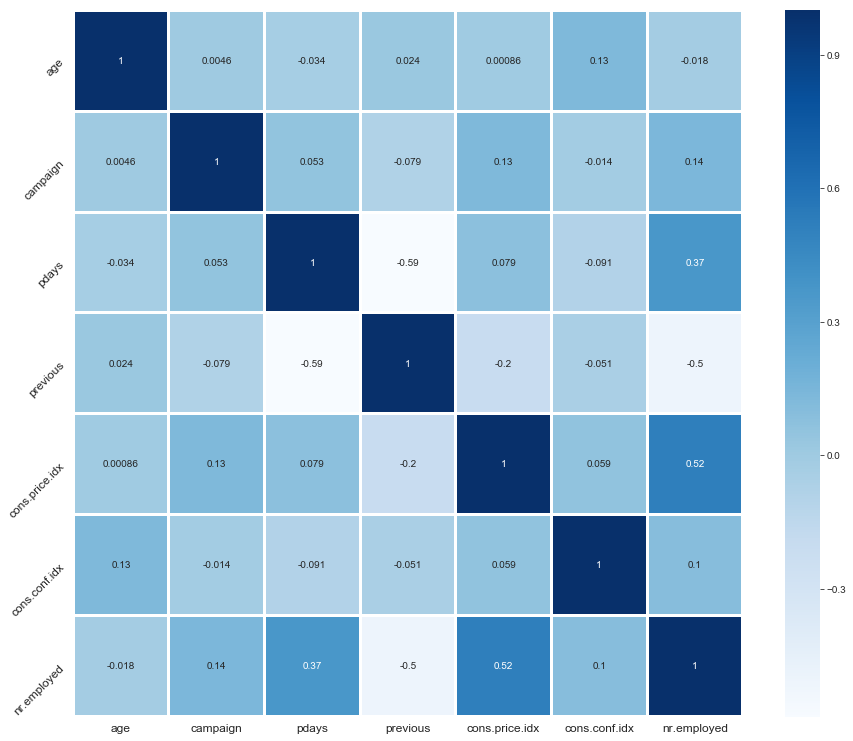

In [17]:
#Another look at Correlation Matrix with reduced multicollinearity
corr = num_features.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr, fmt='.2g', cmap = 'Blues', annot = True, linewidth = 2, robust = True)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation=45)
plt.show()

Next we will visualize a box plot to visualize the scale and outliers of our numerical features.

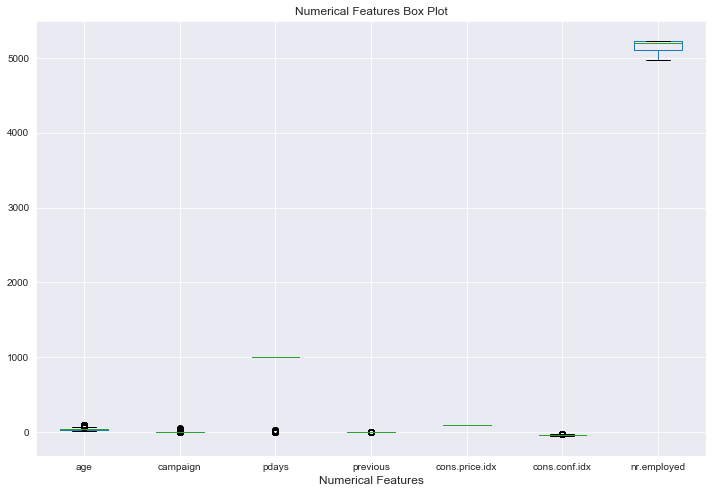

In [18]:
num_features.boxplot(figsize=(12,8))
plt.xlabel('Numerical Features', size=12)
plt.title('Numerical Features Box Plot')
plt.show()

The 'nr.employed' column is clearly on a completely different scale from the other features, so we will look at the box plots again without that feature.

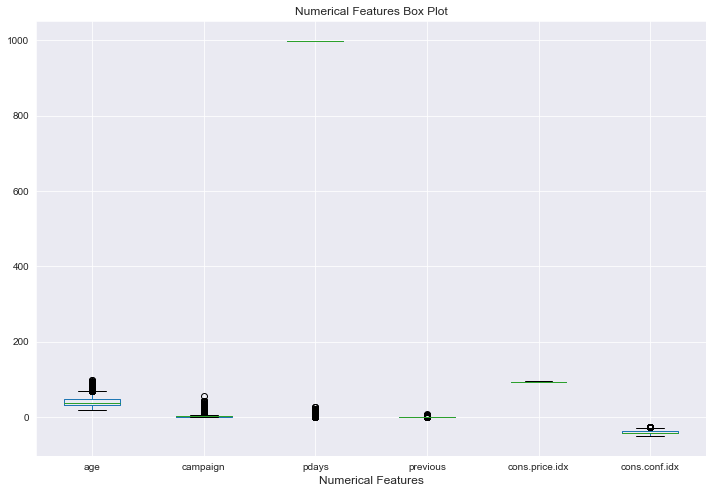

In [19]:
num_features.drop(columns = "nr.employed").boxplot(figsize=(12,8))
plt.xlabel('Numerical Features', size=12)
plt.title('Numerical Features Box Plot')
plt.show()

Let's take a closer look at the pdays column:

In [20]:
num_features.pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [21]:
num_features.pdays.value_counts()[:10]

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
Name: pdays, dtype: int64

In [22]:
num_features.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Fronm the data description above the 'pday' column assigns '999' when the client was not previously contacted.  A large majority of customers were not previously contacted, so that feature does not give us a ton of information.  We will be fine with dropping the column, especially since we have the 'previous' column which is the number of contacts before this campaign.

In [23]:
#drop pdays column
num_features.drop('pdays', axis=1, inplace=True)

num_features.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed
0,56,1,0,93.994,-36.4,5191.0
1,57,1,0,93.994,-36.4,5191.0
2,37,1,0,93.994,-36.4,5191.0
3,40,1,0,93.994,-36.4,5191.0
4,56,1,0,93.994,-36.4,5191.0


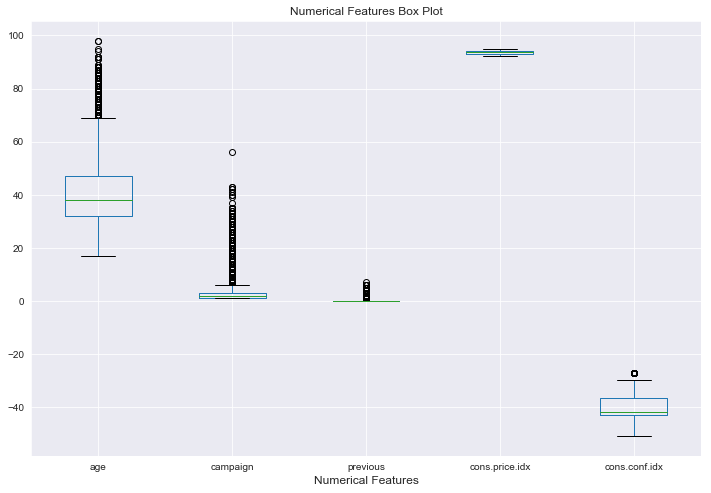

In [24]:
num_features.drop(columns = "nr.employed").boxplot(figsize=(12,8))
plt.xlabel('Numerical Features', size=12)
plt.title('Numerical Features Box Plot')
plt.show()

That gives us a much better look at the range and scale of the numerical features.  There is still a significant variance in scale of the numerical data (especially for the consumer confidence index and consumer price index) so we will want to scale our features to prepare them for machine learning modeling.


### Preprocessing the Data

Here we will one hot encode the categorical features to make the suitable for modeling.

In [25]:
dummified_features = pd.get_dummies(cat_features, drop_first=True)

dummified_features.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


Next we will scale our numerical features using sklearn's Standard Scaler to ensure that features on different scales do not have an outsized effect on our models' results.  

In [26]:
scaler = StandardScaler()
scaled_feats = scaler.fit_transform(num_features)

scaled_feats = pd.DataFrame(scaled_feats, columns = num_features.columns)
scaled_feats.head()


,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed
0,1.533034,-0.565922,-0.349494,0.722722,0.886447,0.33168
1,1.628993,-0.565922,-0.349494,0.722722,0.886447,0.33168
2,-0.290186,-0.565922,-0.349494,0.722722,0.886447,0.33168
3,-0.002309,-0.565922,-0.349494,0.722722,0.886447,0.33168
4,1.533034,-0.565922,-0.349494,0.722722,0.886447,0.33168


We will take another look at the histograms and box plots after scaling our features.

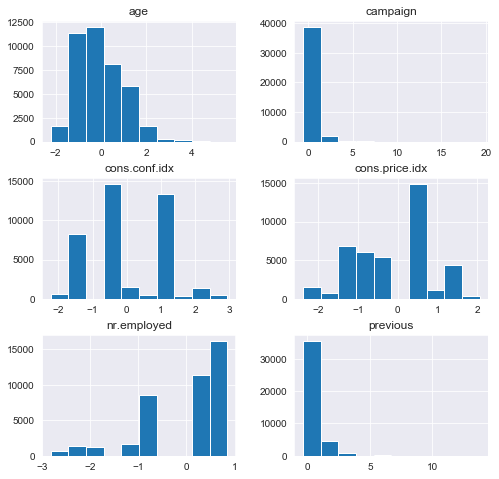

In [27]:
#Plot histograms of numerical columns
scaled_feats.hist(figsize=(8,8))
plt.show()

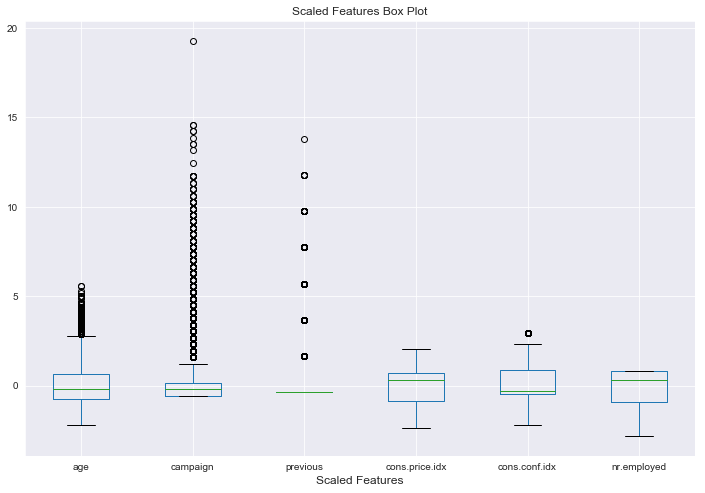

In [28]:
scaled_feats.boxplot(figsize=(12,8))
plt.xlabel('Scaled Features', size=12)
plt.title('Scaled Features Box Plot')
plt.show()

With our features encoded and scaled we are nearly ready to being modeling the data. We will rejoin the categorical and numerical features with our target variable into a single dataframe.

In [29]:
target = df.deposit
bank_data = pd.concat([dummified_features, scaled_feats, target], axis=1)
bank_data.shape

(41188, 50)

In [30]:
bank_data.tail()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,day_of_week_wed,poutcome_nonexistent,poutcome_success,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,deposit
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,3.164336,-0.565922,-0.349494,2.058168,-2.224953,-2.815697,yes
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0.573445,-0.565922,-0.349494,2.058168,-2.224953,-2.815697,no
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1.533034,-0.204909,-0.349494,2.058168,-2.224953,-2.815697,no
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.381527,-0.565922,-0.349494,2.058168,-2.224953,-2.815697,yes
41187,0,0,0,0,1,0,0,0,0,0,...,0,0,0,3.260295,0.156105,1.671136,2.058168,-2.224953,-2.815697,no


Before modeling we need to address the class imbalance discovered above, that only 11.27% of the 41188 calls resulted in deposits. In the interest of time for running these models, we will downsample the majority class.

In [31]:
#Another look at our target class imbalance
bank_data.deposit.value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

### Downsample only the training data.  Leave test data untouched!!

In [32]:
#Downsampling majority class. example code from https://elitedatascience.com/imbalanced-classes
majority = bank_data[bank_data.deposit == 'no']
minority = bank_data[bank_data.deposit == 'yes']

#downsample with n_samples equal to size of minority class
majority_downsampled = resample(majority, replace=False, n_samples=4640, random_state=random_state)
                               
df_downsampled = pd.concat([majority_downsampled, minority])

#Display new balanced class counts
df_downsampled.deposit.value_counts()


yes    4640
no     4640
Name: deposit, dtype: int64

Finally, we will convert our target variable to an integer: 1 if 'yes' the customer subscribed to the term deposit and 0 if 'no' the customer did not subscribe to the term deposit

In [33]:
df_downsampled.deposit = df_downsampled.deposit.map({'yes' : 1, 'no': 0})

In [34]:
df_downsampled.deposit.value_counts()

1    4640
0    4640
Name: deposit, dtype: int64

In [35]:
feats = df_downsampled.drop('deposit', axis=1)
target = df_downsampled.deposit

## Modeling the Data

First we will split our data into training and testing sets.  We will use an 80/20 split for all models.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.2, random_state = random_state)

#### Baseline Logistic Regression Model

In [37]:
#Instantiate and fit a baseline logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
#make predictions on X_test set
log_preds = logreg.predict(X_test)
log_acc = round((accuracy_score(y_test, log_preds)*100), 2)
print('Baseline Logistic Regression Model')
print('-' * 60)
print(f'Test Accuracy Score: {log_acc}%')
# Add precision and recall 
print('-' * 60)
print(classification_report(y_test, log_preds))
print('-' * 60)

Baseline Logistic Regression Model
------------------------------------------------------------
Test Accuracy Score: 73.22%
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       914
           1       0.82      0.61      0.70       942

   micro avg       0.73      0.73      0.73      1856
   macro avg       0.75      0.73      0.73      1856
weighted avg       0.75      0.73      0.73      1856

------------------------------------------------------------


#### Add precision and recall scores above.  I think we want to optimize precision ... limit False Positives

In [59]:
len(y_test)

1856

In [60]:
sum(y_test) * 2

1884

In [66]:
sum(y_train) * 2

7396

In [65]:
len(y_train)

7424

  Now we will look at a confusion matrix using a seaborn heatmap to visualize how the model performed on each of our classes.

In [42]:
#Function to plot a confusion matrix given true and predicted values from a model
def plot_conf_matrix(y_true, y_pred, model_name=None, cmap='Blues'):
    class_names = set(y_true)
    cm = confusion_matrix(y_true, y_pred)
    dataframe = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(8,6))
    sns.heatmap(dataframe, annot=True, cbar=None, cmap=cmap, fmt='.00f', annot_kws={"size":12})
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name), fontsize=15)
    else:
        plt.title("Confusion Matrix", fontsize=15)
    plt.ylabel("True Class",fontsize=12)
    plt.xlabel('Predicted Class', fontsize=12)
    plt.show()

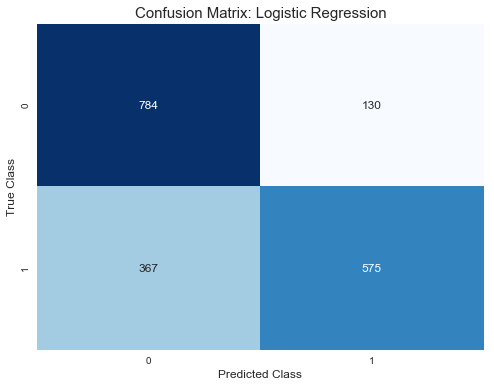

In [43]:
plot_conf_matrix(y_test, log_preds, model_name='Logistic Regression')

As we can see, the baseline logistic regression model achieves an accuracy score of 73%.  Despite an even number of 

Initial Model Test AUC: 0.7777471927599456
Initial Model Train AUC: 0.7983757305090419


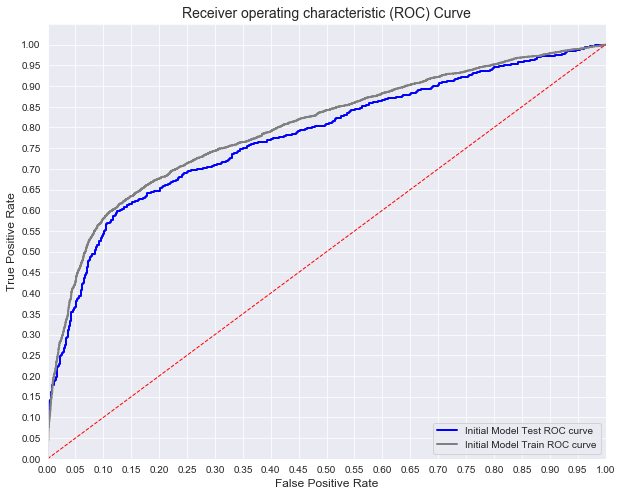

In [48]:
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Initial Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Initial Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
plt.plot(test_fpr, test_tpr, color = 'blue', lw = 2, label ='Initial Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color = 'grey', lw = 2, label ='Initial Model Train ROC curve')

plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver operating characteristic (ROC) Curve', size = 14)
plt.legend(loc="lower right")
plt.show()